# Blending and Pasting Images

For some computer vision systems, we'll want to be able to post our own image on top of an already existing image or video. We may also want to blend images, maybe we want to have a "highlight" effect instead of just a solid box or empty rectangle.

Let's explore what is commonly known as **Arithmetic Image Operations** with OpenCV. These are referred to as Arithmetic Operations because OpenCV is simply performing some common math with the pixels for the final effect. We'll see a bit of this in our code.

## Blending Images

Blending Images is actually quite simple, let's look at a simple example.

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1 = cv2.imread("D:\Computer-Vision-with-Python\DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("D:\Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

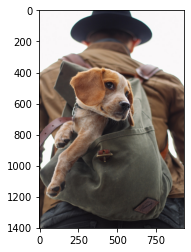

In [3]:
plt.imshow(img1)

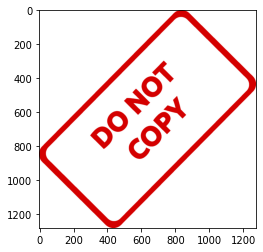

In [4]:
plt.imshow(img2)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

### Resizing the Images

In [7]:
# BLENDING IMAGES OF THE SAME SIZE

In [8]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

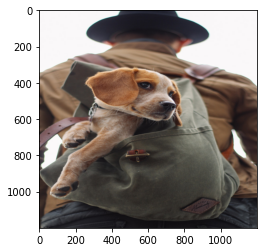

In [9]:
plt.imshow(img1)

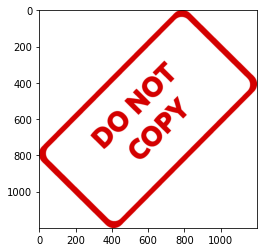

In [10]:
plt.imshow(img2)

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [11]:
# ONLY WORKS WHEN IMAGES ARE OF SAME SIZES

blended = cv2.addWeighted(src1=img1,alpha=0.3,src2=img2,beta=0.5,gamma=0)

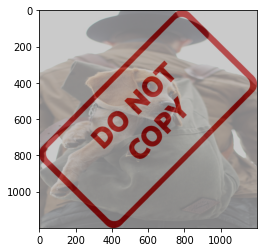

In [12]:
plt.imshow(blended)

-----

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

In [13]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE ( NO BLENDING )
# Numpy reassignment

In [14]:
img1 = cv2.imread("D:\Computer-Vision-with-Python\DATA\dog_backpack.png")
img2 = cv2.imread("D:\Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2 = cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

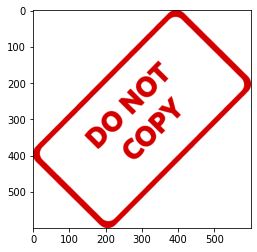

In [15]:
plt.imshow(img2)

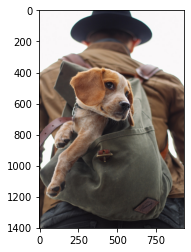

In [16]:
plt.imshow(img1)

In [17]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [18]:
small_img.shape

(600, 600, 3)

In [19]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

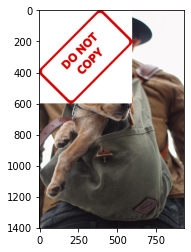

In [20]:
plt.imshow(large_img)

________
_______

## Blending Images of Different Sizes

In [21]:
import numpy as np
import cv2

In [22]:
img1 = cv2.imread("D:\Computer-Vision-with-Python\DATA\dog_backpack.png")
img2 = cv2.imread("D:\Computer-Vision-with-Python\DATA\watermark_no_copy.png")
img2 = cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

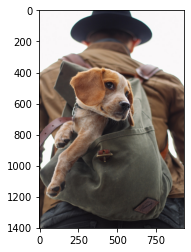

In [23]:
plt.imshow(img1)

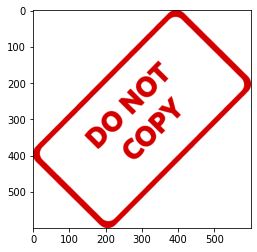

In [24]:
plt.imshow(img2)

### Create a Region of Interest (ROI)

In [25]:
img1.shape

(1401, 934, 3)

In [26]:
x_offset=934-600
y_offset=1401-600

In [27]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

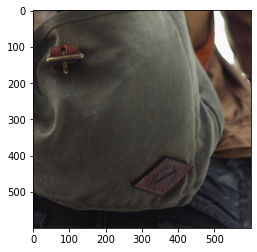

In [28]:
plt.imshow(roi)

In [29]:
roi.shape

(600, 600, 3)

### Creating a Mask

In [30]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [31]:
img2gray.shape

(600, 600)

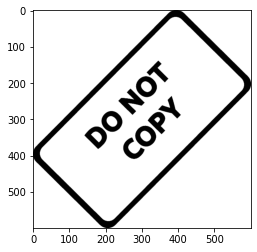

In [32]:
plt.imshow(img2gray,cmap='gray')

In [33]:
mask_inv = cv2.bitwise_not(img2gray)

In [34]:
mask_inv.shape

(600, 600)

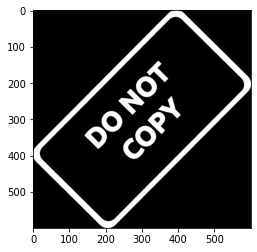

In [35]:
plt.imshow(mask_inv,cmap='gray')

## Convert Mask to have 3 channels

In [36]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [37]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [38]:
bk.shape

(600, 600, 3)

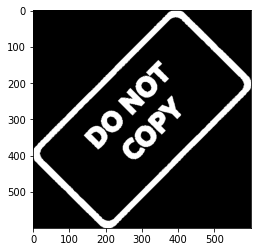

In [39]:
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

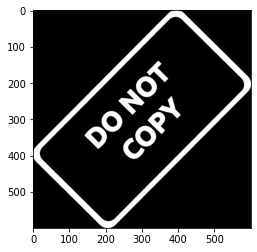

In [40]:
plt.imshow(mask_inv,cmap='gray')

In [41]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

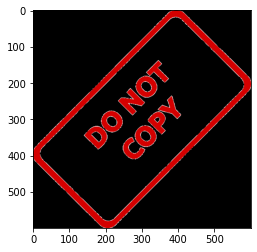

In [42]:
plt.imshow(fg)

In [43]:
fg.shape

(600, 600, 3)